In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [116]:
df=pd.read_csv(r"ToyotaCorolla - MLR.csv")
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#### 1.Perform exploratory analysis(EDA) to gain insights into the dataset. Provide visualizations & summary statistics of the variables. Pre process the data to apply the MLR.

In [117]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [118]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [120]:
df.describe()

 # only shows statistics for numerical columns 
# all columns count are same i.e 1436 :- so no NA values or null values or missing values  
# outliers :- by comparing max and 75% :- columns such as Price , KM , HP , cc , Weight :- gives outliers are upper extreme part
            # by comparing min and 25% :- columns such as Price , Age , KM , HP :- gives outliers at lower extreme part

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [121]:
df.describe(include=object)

,Fuel_Type
count,1436
unique,3
top,Petrol
freq,1264


In [122]:

label_encoder=LabelEncoder()

df['Fuel_Type']=label_encoder.fit_transform(df['Fuel_Type'])

In [123]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [125]:
df.dtypes

Price        int64
Age_08_04    int64
KM           int64
Fuel_Type    int64
HP           int64
Automatic    int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
dtype: object

In [126]:
df['Fuel_Type'].value_counts() #count the frequency of the unique value in a column

Fuel_Type
2    1264
1     155
0      17
Name: count, dtype: int64

In [127]:
df['HP'].value_counts()

HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: count, dtype: int64

In [128]:
df['Automatic'].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [129]:
df['cc'].value_counts()

cc
1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1332       2
1398       2
16000      1
1975       1
Name: count, dtype: int64

In [130]:
df['Doors'].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [131]:
df['Cylinders'].value_counts() 
#as column values are all 4 only, so we need to keep or drop this column

Cylinders
4    1436
Name: count, dtype: int64

In [132]:
df['Gears'].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

In [133]:
df['Weight'].value_counts()

Weight
1075    192
1050    168
1015    117
1035    106
1070     89
1025     70
1065     51
1080     47
1055     43
1060     40
1100     40
1085     40
1115     39
1110     38
1040     35
1135     33
1105     31
1045     31
1130     29
1030     24
1000     17
1120     17
1140     16
1114     10
1090     10
1185      9
1020      9
1165      8
1255      7
1150      7
1180      5
1260      5
1010      4
1095      4
1205      4
1480      4
1170      4
1245      3
1119      3
1320      3
1270      3
1275      2
1195      2
1155      2
1280      1
1265      1
1125      1
1160      1
1067      1
1121      1
1084      1
1615      1
1103      1
1078      1
1109      1
1079      1
1172      1
1094      1
1083      1
Name: count, dtype: int64

In [134]:
df.drop(columns=['Cylinders'],inplace=True)
df
#cylinders column is droped

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,5,1025
1432,10845,72,19000,2,86,0,1300,3,5,1015
1433,8500,71,17016,2,86,0,1300,3,5,1015
1434,7250,70,16916,2,86,0,1300,3,5,1015


In [135]:
df.duplicated().sum()

np.int64(1)

In [136]:
df[df.duplicated(keep=False)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
112,24950,8,13253,1,116,0,2000,5,5,1320
113,24950,8,13253,1,116,0,2000,5,5,1320


In [137]:
df.drop_duplicates(inplace=True)

In [138]:
df.duplicated().sum()

np.int64(0)

In [139]:
df.rename(columns={'Age_08_04': 'Age'}, inplace=True)
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,5,1025
1432,10845,72,19000,2,86,0,1300,3,5,1015
1433,8500,71,17016,2,86,0,1300,3,5,1015
1434,7250,70,16916,2,86,0,1300,3,5,1015


In [145]:
#visualization

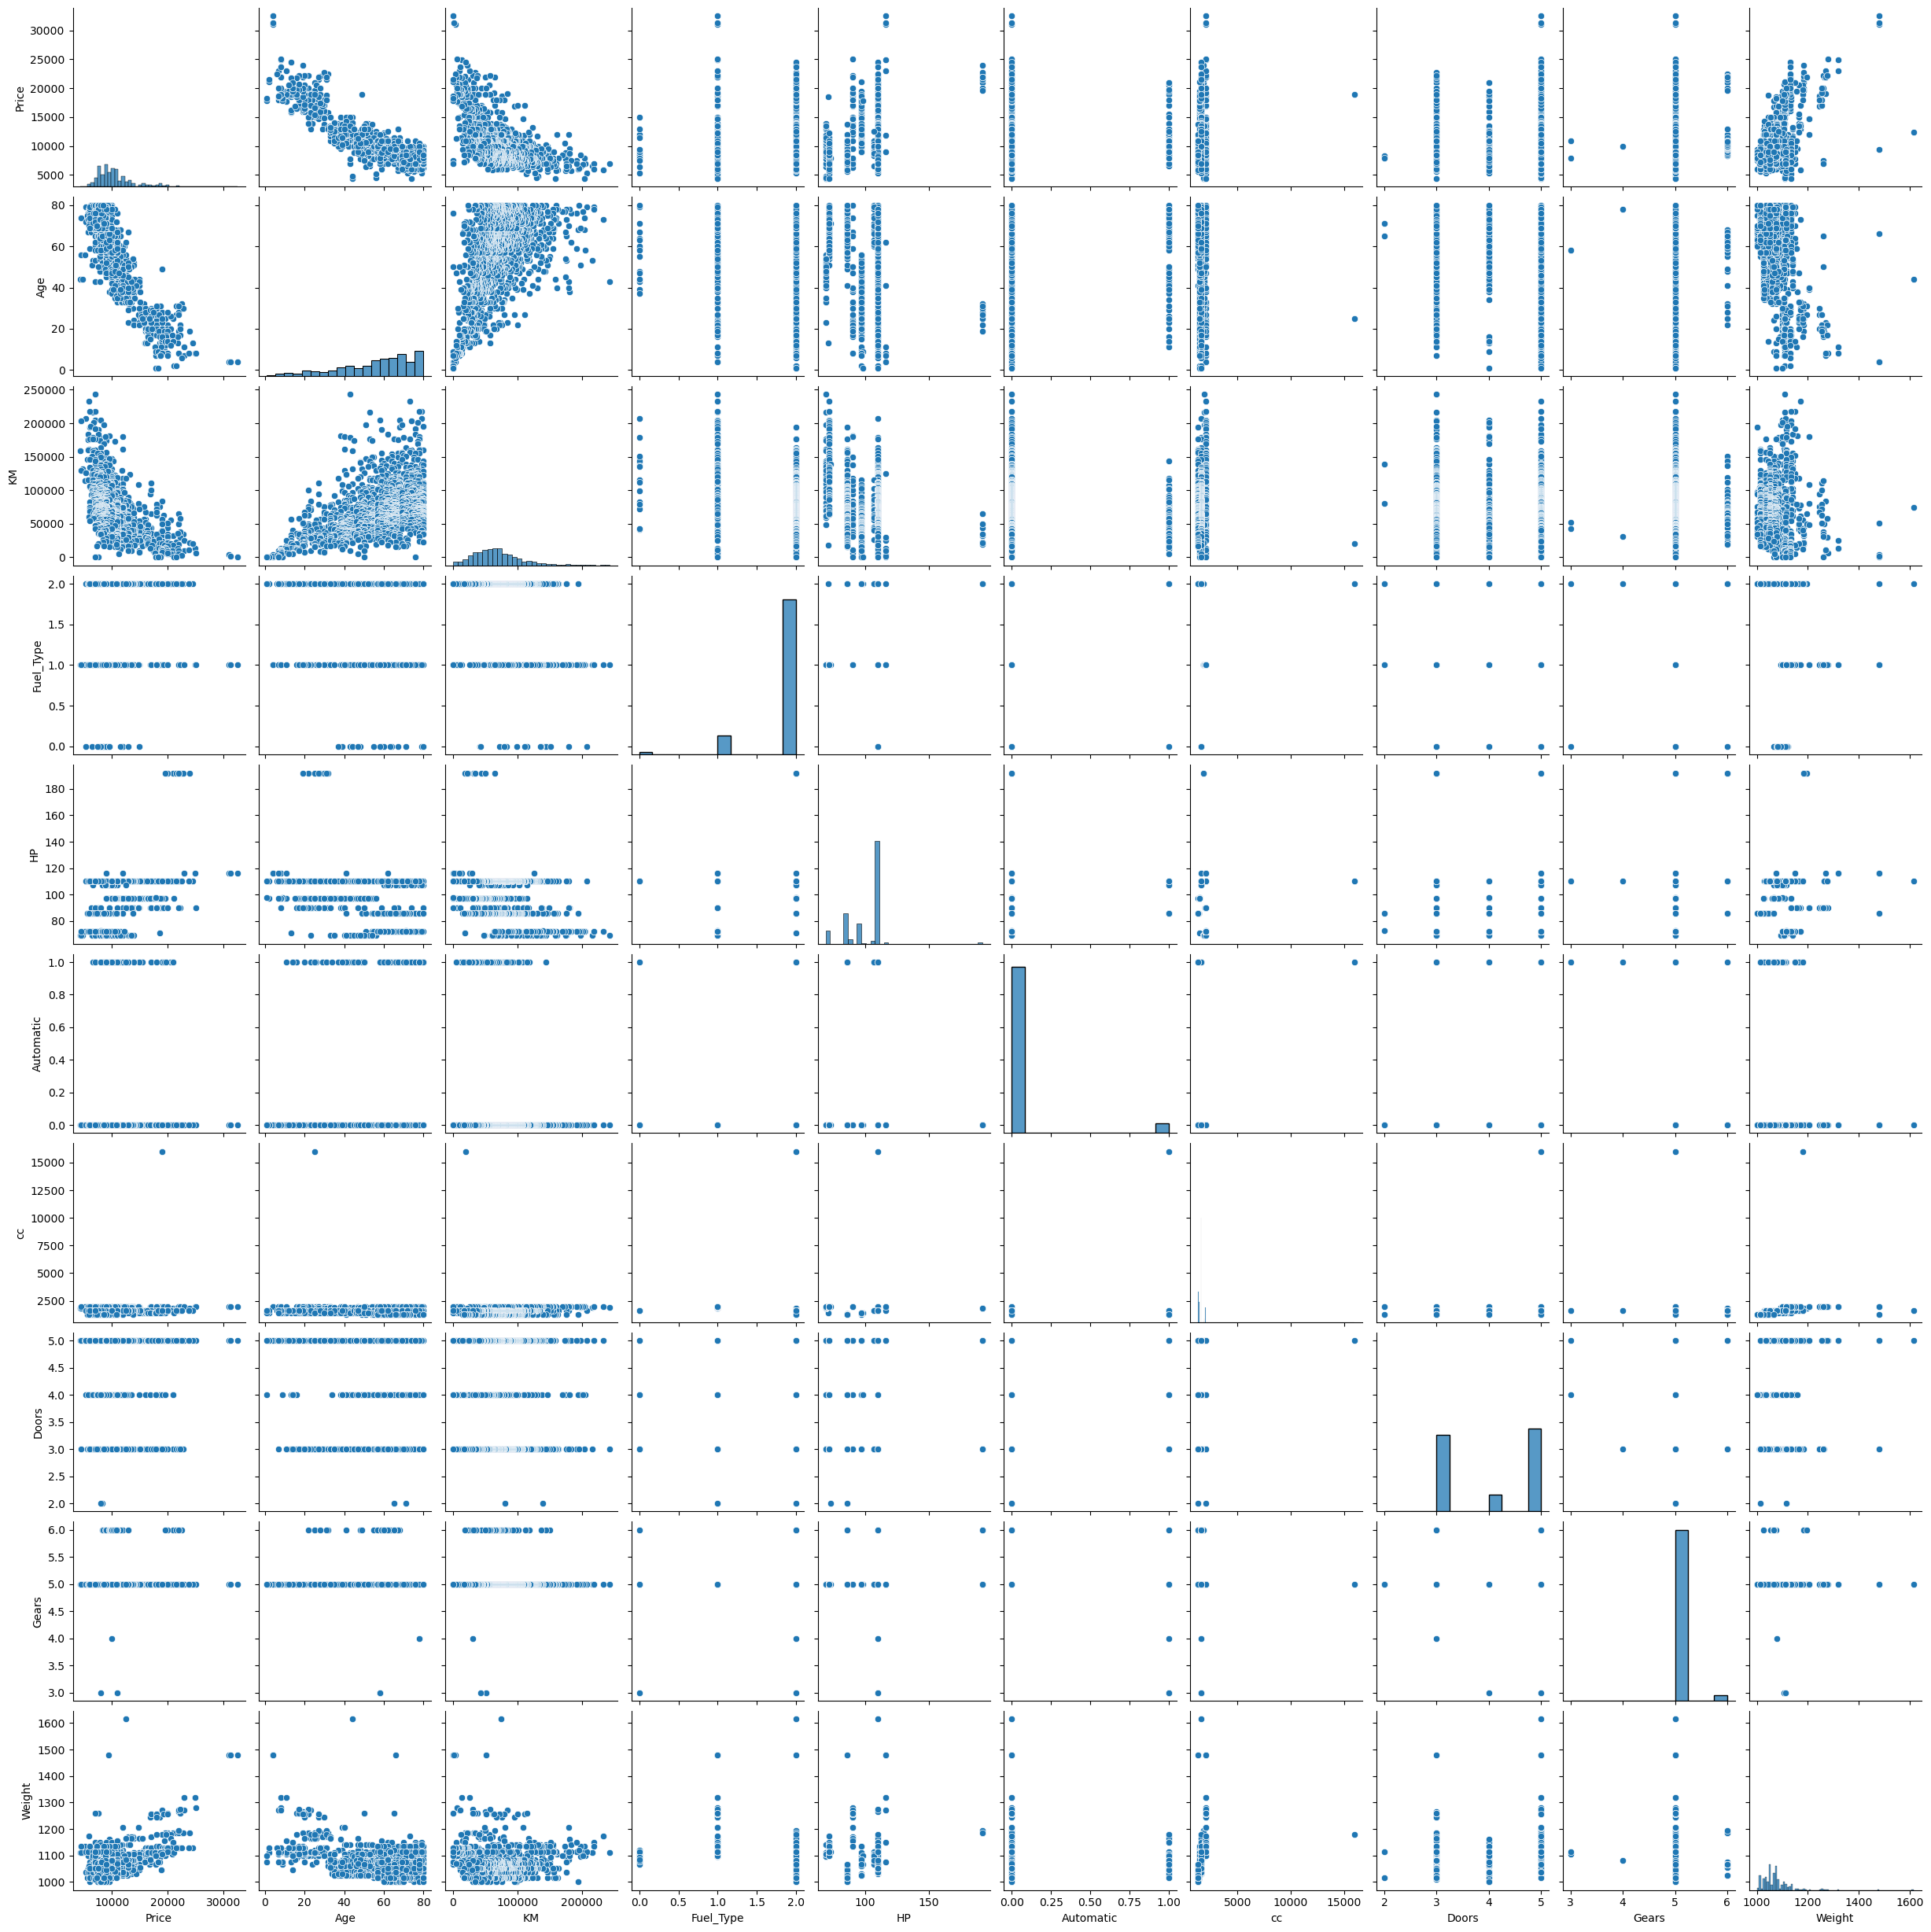

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

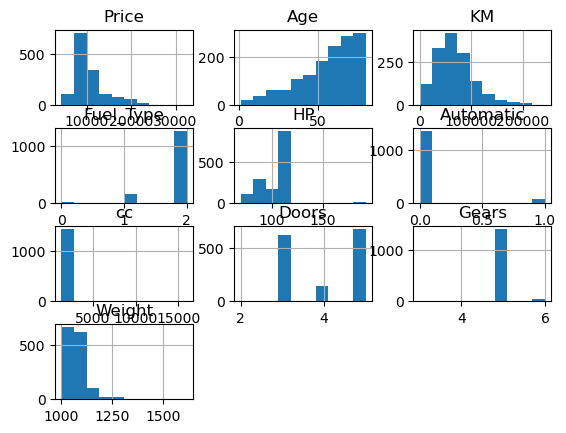

In [151]:
df.hist()
plt.tight_layout
plt.show()

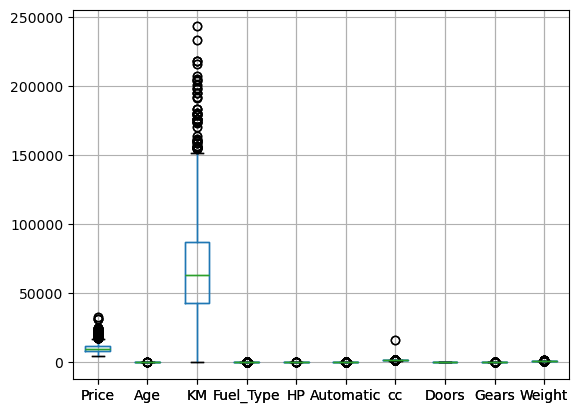

In [154]:
df.boxplot() 
plt.show()
#outliers present in most of the columns

In [155]:
df.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,1.868990,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,0.370993,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,2.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,2.000000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [156]:
# treating outliers:- using capping

In [157]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

In [158]:
outlier_detection(df,'Price')

lower_extreme:- 3200.0 , upper_extreme:- 17200.0 , q1:- 8450.0 , q3:- 11950.0


In [159]:
df.loc[df['Price']>17200.0,'Price'] = 17200.0

In [160]:
df.loc[df['Price']<3200.0,'Price'] = 3200.0

In [161]:
outlier_detection(df,'Age')

lower_extreme:- 5.0 , upper_extreme:- 109.0 , q1:- 44.0 , q3:- 70.0


In [162]:
df.loc[df['Age']>109.0,'Age'] = 109.0

In [163]:
df.loc[df['Age']<5.0,'Age'] = 5.0

In [164]:
outlier_detection(df,'KM')

lower_extreme:- -23062.25 , upper_extreme:- 153103.75 , q1:- 43000.0 , q3:- 87041.5


In [166]:
df.loc[df['KM']>153103.75,'KM'] = 153103.75

In [167]:
df.loc[df['KM']<-23062.25,'KM'] = -23062.25

In [168]:
outlier_detection(df,'HP')

lower_extreme:- 60.0 , upper_extreme:- 140.0 , q1:- 90.0 , q3:- 110.0


In [169]:
df.loc[df['HP']>140.0,'HP'] = 140.0

In [170]:
df.loc[df['HP']<60.0,'HP'] = 60.0

In [171]:
outlier_detection(df,'cc')

lower_extreme:- 1100.0 , upper_extreme:- 1900.0 , q1:- 1400.0 , q3:- 1600.0


In [172]:
df.loc[df['cc']>1900.0,'cc'] = 1900.0

In [173]:
df.loc[df['cc']<1100.0,'cc'] = 1100.0

In [174]:
outlier_detection(df,'Weight')

lower_extreme:- 972.5 , upper_extreme:- 1152.5 , q1:- 1040.0 , q3:- 1085.0


In [175]:
df.loc[df['Weight']>1152.5,'Weight'] = 1152.5

In [176]:
df.loc[df['Weight']<972.5,'Weight'] = 972.5

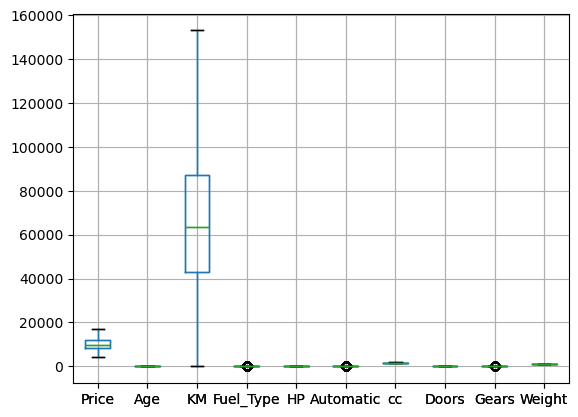

In [178]:
df.boxplot()
plt.show()
#all columns outliers are treated

In [179]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,1,90,0,1900,3,5,1152.5
1,13750,23,72937.0,1,90,0,1900,3,5,1152.5
2,13950,24,41711.0,1,90,0,1900,3,5,1152.5
3,14950,26,48000.0,1,90,0,1900,3,5,1152.5
4,13750,30,38500.0,1,90,0,1900,3,5,1152.5
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,2,86,0,1300,3,5,1025.0
1432,10845,72,19000.0,2,86,0,1300,3,5,1015.0
1433,8500,71,17016.0,2,86,0,1300,3,5,1015.0
1434,7250,70,16916.0,2,86,0,1300,3,5,1015.0


In [180]:
df['Automatic'].value_counts()    # drop this column

Automatic
0    1355
1      80
Name: count, dtype: int64

In [181]:
df['Gears'].value_counts()    # drop this column

Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64

In [182]:
df['Fuel_Type'].value_counts()    

Fuel_Type
2    1264
1     154
0      17
Name: count, dtype: int64

In [183]:
df.drop(columns=['Doors'],inplace =True)
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986.0,1,90,0,1900,5,1152.5
1,13750,23,72937.0,1,90,0,1900,5,1152.5
2,13950,24,41711.0,1,90,0,1900,5,1152.5
3,14950,26,48000.0,1,90,0,1900,5,1152.5
4,13750,30,38500.0,1,90,0,1900,5,1152.5
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,2,86,0,1300,5,1025.0
1432,10845,72,19000.0,2,86,0,1300,5,1015.0
1433,8500,71,17016.0,2,86,0,1300,5,1015.0
1434,7250,70,16916.0,2,86,0,1300,5,1015.0


In [184]:
#correlation analysis

In [185]:
df.corr()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
Price,1.000000,-0.895340,-0.607949,0.024386,0.254427,0.035860,0.129352,0.053141,0.507823
Age,-0.895340,1.000000,0.530670,0.076442,-0.129602,0.031255,-0.136644,-0.005729,-0.476150
KM,-0.607949,0.530670,1.000000,-0.398364,-0.329729,-0.082221,0.258680,0.019829,0.000977
Fuel_Type,0.024386,0.076442,-0.398364,1.000000,0.458771,0.069456,-0.598360,0.069560,-0.529262
HP,0.254427,-0.129602,-0.329729,0.458771,1.000000,0.022541,0.098192,0.140777,0.024877
Automatic,0.035860,0.031255,-0.082221,0.069456,0.022541,1.000000,-0.059263,-0.098582,0.090598
cc,0.129352,-0.136644,0.258680,-0.598360,0.098192,-0.059263,1.000000,0.052222,0.717782
Gears,0.053141,-0.005729,0.019829,0.069560,0.140777,-0.098582,0.052222,1.000000,0.020166
Weight,0.507823,-0.476150,0.000977,-0.529262,0.024877,0.090598,0.717782,0.020166,1.000000


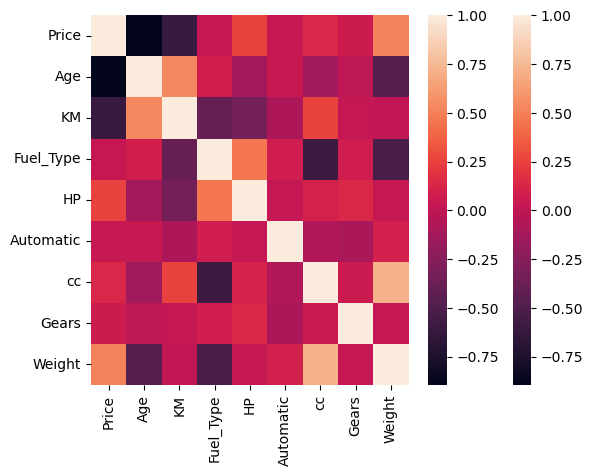

In [187]:
sns.heatmap(df.corr())
plt.show()

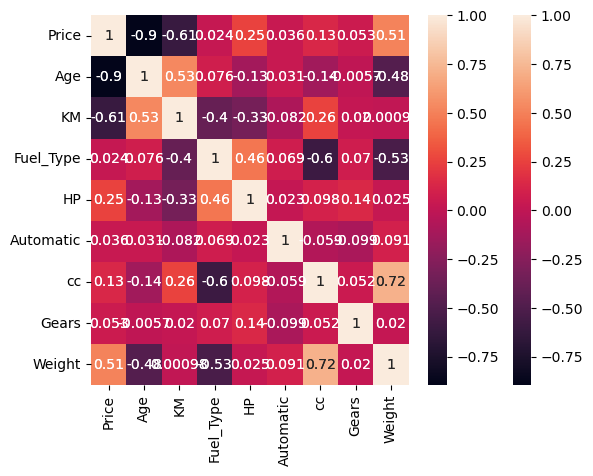

In [189]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### 2.Split the dataset into training & testing sets (e.g., 80% training, 20% testing)

In [190]:
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,13500,23,46986.0,1,90,0,1900,5,1152.5
1,13750,23,72937.0,1,90,0,1900,5,1152.5
2,13950,24,41711.0,1,90,0,1900,5,1152.5
3,14950,26,48000.0,1,90,0,1900,5,1152.5
4,13750,30,38500.0,1,90,0,1900,5,1152.5
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,2,86,0,1300,5,1025.0
1432,10845,72,19000.0,2,86,0,1300,5,1015.0
1433,8500,71,17016.0,2,86,0,1300,5,1015.0
1434,7250,70,16916.0,2,86,0,1300,5,1015.0


In [203]:
#Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

In [204]:
sc = StandardScaler()

In [205]:
scaled_df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [206]:
scaled_df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,1.009230,-1.781129,-0.595118,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
1,1.093220,-1.781129,0.152463,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
2,1.160412,-1.727143,-0.747078,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
3,1.496370,-1.619171,-0.565908,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
4,1.093220,-1.403226,-0.839578,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
...,...,...,...,...,...,...,...,...,...
1430,-1.006519,0.702234,-1.356844,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.154108
1431,0.117261,0.864192,-1.401323,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293
1432,-0.670561,0.810206,-1.458477,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293
1433,-1.090508,0.756220,-1.461357,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293


In [207]:
x = scaled_df.drop('Price', axis=1)

In [208]:
x

,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
0,-1.781129,-0.595118,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
1,-1.781129,0.152463,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
2,-1.727143,-0.747078,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
3,-1.619171,-0.565908,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
4,-1.403226,-0.839578,-2.343149,-0.844145,-0.242983,2.024972,-0.140475,2.226997
...,...,...,...,...,...,...,...,...
1430,0.702234,-1.356844,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.154108
1431,0.864192,-1.401323,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293
1432,0.810206,-1.458477,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293
1433,0.756220,-1.461357,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293


In [209]:
y=scaled_df[['Price']]
y

,Price
0,1.009230
1,1.093220
2,1.160412
3,1.496370
4,1.093220
...,...
1430,-1.006519
1431,0.117261
1432,-0.670561
1433,-1.090508


In [210]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train

,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
1127,1.188109,1.198921,0.353257,0.677744,-0.242983,0.246978,-0.140475,0.039223
898,0.324331,-0.240528,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-0.888923
1187,0.810206,0.654662,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-0.888923
310,-0.647420,-0.840702,0.353257,0.677744,-0.242983,0.246978,-0.140475,0.304408
1144,1.026151,0.985515,0.353257,0.677744,-0.242983,0.246978,-0.140475,0.039223
...,...,...,...,...,...,...,...,...
1095,1.026151,1.663786,0.353257,0.677744,-0.242983,0.246978,-0.140475,-0.491146
1130,1.026151,1.133729,0.353257,0.677744,-0.242983,0.246978,-0.140475,-0.491146
1294,1.296082,0.111066,0.353257,0.677744,-0.242983,0.246978,-0.140475,-0.888923
860,0.486289,-0.086841,0.353257,0.677744,-0.242983,0.246978,-0.140475,0.039223


In [211]:
X_test

,Age,KM,Fuel_Type,HP,Automatic,cc,Gears,Weight
752,0.162372,0.368317,0.353257,0.677744,-0.242983,0.246978,5.164307,-0.093369
857,0.324331,-0.082030,0.353257,0.677744,-0.242983,0.246978,-0.140475,0.171816
629,0.162372,1.796300,-2.343149,-2.213845,-0.242983,2.024972,-0.140475,1.762924
1411,0.702234,-0.715706,0.353257,0.677744,-0.242983,0.246978,-0.140475,-0.491146
974,0.486289,-0.594312,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293
...,...,...,...,...,...,...,...,...
1112,0.918178,1.389453,0.353257,0.677744,-0.242983,0.246978,-0.140475,-0.888923
174,-2.590922,-1.701669,0.353257,0.677744,-0.242983,0.246978,-0.140475,1.630332
1427,0.864192,-1.199671,0.353257,-1.148522,-0.242983,-1.531016,-0.140475,-1.419293
297,-1.133295,-0.767560,0.353257,0.677744,-0.242983,0.246978,-0.140475,0.171816


In [212]:
y_train

,Price
1127,-1.006519
898,-0.334602
1187,-0.855338
310,1.175530
1144,-1.359275
...,...
1095,-0.872136
1130,-0.183421
1294,-1.006519
860,0.152537


In [213]:
y

,Price
0,1.009230
1,1.093220
2,1.160412
3,1.496370
4,1.093220
...,...
1430,-1.006519
1431,0.117261
1432,-0.670561
1433,-1.090508


#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [214]:
# model-1

In [215]:
model=LinearRegression()

In [216]:
model.fit(X_train, y_train)

LinearRegression()

In [217]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [[-0.66505487 -0.17751929  0.04927905  0.09444537  0.0170812  -0.10678131
   0.03388454  0.28751509]]
Model Intercept: [-0.00497037]


In [218]:
#model-2

In [219]:
x_1 = scaled_df.drop(columns=['Price','Automatic'],axis=1)

In [220]:
x_1

,Age,KM,Fuel_Type,HP,cc,Gears,Weight
0,-1.781129,-0.595118,-2.343149,-0.844145,2.024972,-0.140475,2.226997
1,-1.781129,0.152463,-2.343149,-0.844145,2.024972,-0.140475,2.226997
2,-1.727143,-0.747078,-2.343149,-0.844145,2.024972,-0.140475,2.226997
3,-1.619171,-0.565908,-2.343149,-0.844145,2.024972,-0.140475,2.226997
4,-1.403226,-0.839578,-2.343149,-0.844145,2.024972,-0.140475,2.226997
...,...,...,...,...,...,...,...
1430,0.702234,-1.356844,0.353257,-1.148522,-1.531016,-0.140475,-1.154108
1431,0.864192,-1.401323,0.353257,-1.148522,-1.531016,-0.140475,-1.419293
1432,0.810206,-1.458477,0.353257,-1.148522,-1.531016,-0.140475,-1.419293
1433,0.756220,-1.461357,0.353257,-1.148522,-1.531016,-0.140475,-1.419293


In [221]:
y

,Price
0,1.009230
1,1.093220
2,1.160412
3,1.496370
4,1.093220
...,...
1430,-1.006519
1431,0.117261
1432,-0.670561
1433,-1.090508


In [222]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y, test_size=0.2, random_state=42)

In [223]:
model_1 = LinearRegression()

In [224]:
model_1.fit(X_train_1, y_train_1)

LinearRegression()

In [225]:
print("Model Coefficients:", model_1.coef_)
print("Model Intercept:", model_1.intercept_)

Model Coefficients: [[-0.66095743 -0.17910045  0.05158154  0.09414236 -0.11081026  0.03256845
   0.29516429]]
Model Intercept: [-0.00517711]


In [226]:
#model-3

In [227]:
x_2= scaled_df.drop(columns=['Price','Automatic','Fuel_Type'],axis=1)

In [228]:
x_2

,Age,KM,HP,cc,Gears,Weight
0,-1.781129,-0.595118,-0.844145,2.024972,-0.140475,2.226997
1,-1.781129,0.152463,-0.844145,2.024972,-0.140475,2.226997
2,-1.727143,-0.747078,-0.844145,2.024972,-0.140475,2.226997
3,-1.619171,-0.565908,-0.844145,2.024972,-0.140475,2.226997
4,-1.403226,-0.839578,-0.844145,2.024972,-0.140475,2.226997
...,...,...,...,...,...,...
1430,0.702234,-1.356844,-1.148522,-1.531016,-0.140475,-1.154108
1431,0.864192,-1.401323,-1.148522,-1.531016,-0.140475,-1.419293
1432,0.810206,-1.458477,-1.148522,-1.531016,-0.140475,-1.419293
1433,0.756220,-1.461357,-1.148522,-1.531016,-0.140475,-1.419293


In [229]:
y

,Price
0,1.009230
1,1.093220
2,1.160412
3,1.496370
4,1.093220
...,...
1430,-1.006519
1431,0.117261
1432,-0.670561
1433,-1.090508


In [230]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.2, random_state=42)

In [231]:
model_2 = LinearRegression()

In [232]:
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [233]:
print("Model Coefficients:", model_2.coef_)
print("Model Intercept:", model_2.intercept_)

Model Coefficients: [[-0.65699859 -0.18804292  0.11813259 -0.13552594  0.0319291   0.28708058]]
Model Intercept: [-0.00494412]


#### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.



In [100]:
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"R-squared: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

In [101]:
# for 1st model 
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

R-squared: 0.8534, MAE: 0.29, RMSE: 0.38


In [102]:
# model 1 Accuracy :- 0.8513 

In [103]:
# for 2nd model
y_pred_1 = model_1.predict(X_test_1)
evaluate_model(y_test_1, y_pred_1)

R-squared: 0.8544, MAE: 0.29, RMSE: 0.37


In [104]:
# model 2 Accuracy :- 0.8544

In [105]:
# for 3rd model
y_pred_2 = model_2.predict(X_test_2)
evaluate_model(y_test_2, y_pred_2)

R-squared: 0.8513, MAE: 0.29, RMSE: 0.38


In [106]:
# model 3 Accuracy :- 0.8513

#### 5.Apply Lasso and Ridge methods on the model.

In [107]:
# Lasso model :-
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression:")
evaluate_model(y_test, y_pred_lasso)


Lasso Regression:
R-squared: 0.8298, MAE: 0.30, RMSE: 0.40


In [108]:
# Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression:")
evaluate_model(y_test, y_pred_ridge)


Ridge Regression:
R-squared: 0.8534, MAE: 0.29, RMSE: 0.38


Interview Questions

: 1.What is Normalization & Standardization and how is it helpfu?

Normalization scales data to a range of [0, 1] and is helpful for algorithms sensitive to data range. Standardization scales features to have a mean of 0 and a standard deviation of 1, useful for linear models where the scale affects model interpretation.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Feature Selection: Remove one of the highly correlated features. Principal Component Analysis (PCA): Reduce features to uncorrelated components. Regularization: Use Lasso or Ridge to penalize high weights associated with multicollinear features.

In [ ]:
# Conclusion:- 
# therefore :- model-2 Accuracy with 0.8544 is more thn model-1 and model-3 , so  Automatic is less important for predicting price 
# and also :- removing of Fuel_Type also dont affect much on price , so Fuel_Type is also not important to predict price